<a href="https://colab.research.google.com/github/jpenizzotto/proyectofinalds1/blob/main/ProyectoDSParteI%2BPenizzotto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final Data Science 1 - Penizzotto Javier**

La base de datos seleccionada contiene los registros médicos de 5000 pacientes que padecieron insuficiencia cardíaca, recopilados durante su período de seguimiento, donde cada perfil de paciente tiene 13 características clínicas. La idea es aplicar conceptos de matemática y programación para el diseño, implementación y evaluación de una red neuronal desde cero, utilizando únicamente Pandas y NumPy para predecir si un paciente sobrevivirá o no.



**Parte 1: Selección y Análisis de la Base de Datos**

In [1]:
import pandas as pd

# Se cargan los datos de un archivo CSV y ajustamos los nombres de las columnas.
df = pd.read_csv('heart_failure_clinical_records.csv', delimiter=',', decimal='.')
df.columns = ['Age','Anaemia','CPK','Diabetes','Ejection Fraction','High Blood Pressure','Platelets','Serum Creatinine','Serum Sodium','Sex','Smoking','Time','Death Event']

df.head() # Primeras filas del DataFrame

FileNotFoundError: [Errno 2] No such file or directory: 'heart_failure_clinical_records.csv'

In [ ]:
df.tail(10) # Ultimas 10 filas de los registros de los pacientes.

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
4990,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209,0
4991,53.0,1,582,0,45,0,305000.0,1.1,137,1,1,209,0
4992,65.0,1,335,0,35,1,235000.0,0.8,136,0,0,120,0
4993,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4994,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


Realizamos el análisis de los datos del DataFrame

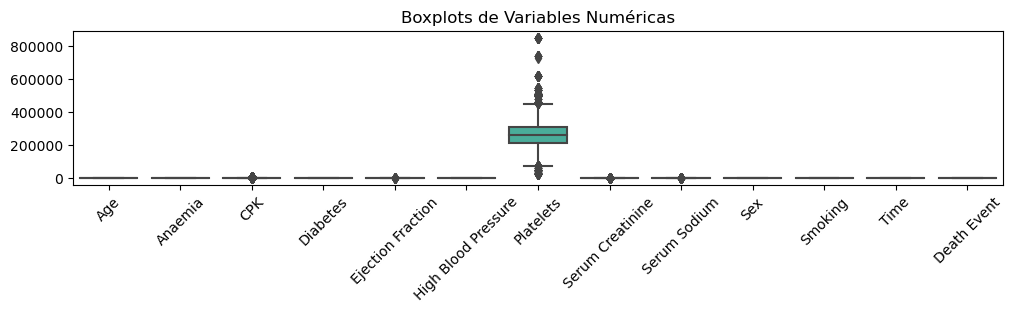

Número de Filas con Valores Atípicos: 1172


In [ ]:
import numpy as np
import seaborn as sns               #Representan los valores atípicos automáticamente en un boxplot con Seaborn y Matplotlib
import matplotlib.pyplot as plt

# Se seleccionan solo las columnas numéricas para el análisis de valores atípicos
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear boxplots para cada variable numérica
#El boxplot me permite visualizar la dispersión, la mediana y la presencia de valores atípicos
plt.figure(figsize=(12, 2))
sns.boxplot(data=df[numeric_columns])          #Los gráficos de caja(boxplot) muestran la mediana, los cuartiles y los valores atípicos de los datos
plt.title('Boxplots de Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Calcular el rango intercuartílico (IQR) para cada columna numérica
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos utilizando el criterio del IQR
outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)

# Contar el número de valores atípicos por fila
num_outliers = outliers.sum()
print("Número de Filas con Valores Atípicos:", num_outliers)

#La caja central para cada variable representa el rango intercuartílico (IQR), que va desde el primer cuartil (Q1) al tercer cuartil (Q3).
#La línea dentro de la caja representa la mediana (Q2) de los datos para esa variable
#Los valores atipicos son los puntos individuales que se pueden observar en las variables.

En la representación grafica anterior podemos ver que la variables Platelets tiene una gran cantidad de valores atipicos (outliers).

Ejection Fraction, Serum Creatinine, Serum Sodium y 'CPK': También muestran algunos outliers, pero no tantos como 'Platelets'.

La mayoría de las otras variables tienen distribuciones mucho más ajustadas con pocos o ningún outlier visible en esta escala.

In [ ]:
# Calcular la mediana de cada columna numérica
medians = df[numeric_columns].median()

# Mostrar las medianas de las variables numéricas
print("\n\tMediana de Variables Numéricas:\n", medians)


	Mediana de Variables Numéricas:
 Age                        60.00
Anaemia                     0.00
CPK                       248.00
Diabetes                    0.00
Ejection Fraction          38.00
High Blood Pressure         0.00
Platelets              263358.03
Serum Creatinine            1.10
Serum Sodium              137.00
Sex                         1.00
Smoking                     0.00
Time                      113.00
Death Event                 0.00
dtype: float64


In [ ]:
df.describe() # Resumen estadistico

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


A continuación se normalizan los datos con StandardScaler para asegurar que todas las características contribuyan de manera equilibrada al entrenamiento de la red neuronal.

StandardScaler convierte cada valor en el DataFrame, para cada valor en la columna, se resta la media de esa columna y luego se divide por la desviación estándar de esa misma columna, transformando los datos para que tengan una media de 0 y una desviación estándar de 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ajustar y transformar los datos con StandardScaler
scaler = StandardScaler()
df_n = scaler.fit_transform(df)   # El resultado es un array
# Convertir el array normalizado de vuelta a un DataFrame de pandas
df_n = pd.DataFrame(df_n, columns=df.columns)
# Mostrar el DataFrame normalizado
df_n.head()

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
0,-0.452181,-0.950046,0.165097,-0.885327,0.631022,-0.757831,-0.017526,-0.068446,0.042968,0.740909,1.485659,-0.551989,-0.675926
1,0.402807,-0.950046,-0.543458,-0.885327,-1.106039,-0.757831,0.407436,3.596194,-1.525206,0.740909,-0.673102,0.987105,-0.675926
2,-1.307168,-0.950046,-0.004874,1.129527,0.023051,-0.757831,0.550307,-0.464623,0.715043,-1.349693,-0.673102,1.465647,-0.675926
3,-0.024687,1.052581,0.171240,1.129527,0.196757,1.319556,0.642154,-0.167490,-2.421306,0.740909,-0.673102,-0.526122,-0.675926
4,2.967771,1.052581,-0.004874,-0.885327,-0.671773,-0.757831,1.999435,0.624865,-1.077157,0.740909,-0.673102,-1.043465,1.479451


Analizamos la correlación de los datos con el DataFrame normalizado "df_n"

In [ ]:
df_n.corr(method='pearson')

,Age,Anaemia,CPK,Diabetes,Ejection Fraction,High Blood Pressure,Platelets,Serum Creatinine,Serum Sodium,Sex,Smoking,Time,Death Event
Age,1.000000,0.123102,-0.064637,-0.099938,0.069380,0.092656,-0.024959,0.178194,-0.026182,0.072581,0.023534,-0.220182,0.249442
Anaemia,0.123102,1.000000,-0.181922,0.002214,0.023465,0.047172,-0.046343,0.032343,0.020723,-0.081526,-0.105996,-0.111049,0.054508
CPK,-0.064637,-0.181922,1.000000,-0.019987,-0.021007,-0.045821,0.024809,-0.004032,0.051404,0.069679,-0.014294,-0.013789,0.079706
Diabetes,-0.099938,0.002214,-0.019987,1.000000,-0.049101,-0.034712,0.072198,-0.019072,-0.107393,-0.153649,-0.167046,0.027454,-0.011273
Ejection Fraction,0.069380,0.023465,-0.021007,-0.049101,1.000000,0.021474,0.060289,-0.038473,0.212627,-0.112841,-0.021421,0.068472,-0.292702
High Blood Pressure,0.092656,0.047172,-0.045821,-0.034712,0.021474,1.000000,0.048044,-0.007362,0.065884,-0.089096,-0.025762,-0.183450,0.094023
Platelets,-0.024959,-0.046343,0.024809,0.072198,0.060289,0.048044,1.000000,-0.005178,0.041101,-0.095209,0.065018,-0.001025,-0.031521
Serum Creatinine,0.178194,0.032343,-0.004032,-0.019072,-0.038473,-0.007362,-0.005178,1.000000,-0.229683,0.042409,0.003029,-0.190489,0.311281
Serum Sodium,-0.026182,0.020723,0.051404,-0.107393,0.212627,0.065884,0.041101,-0.229683,1.000000,-0.053848,-0.013830,0.109712,-0.227355
Sex,0.072581,-0.081526,0.069679,-0.153649,-0.112841,-0.089096,-0.095209,0.042409,-0.053848,1.000000,0.434621,-0.008616,0.055604


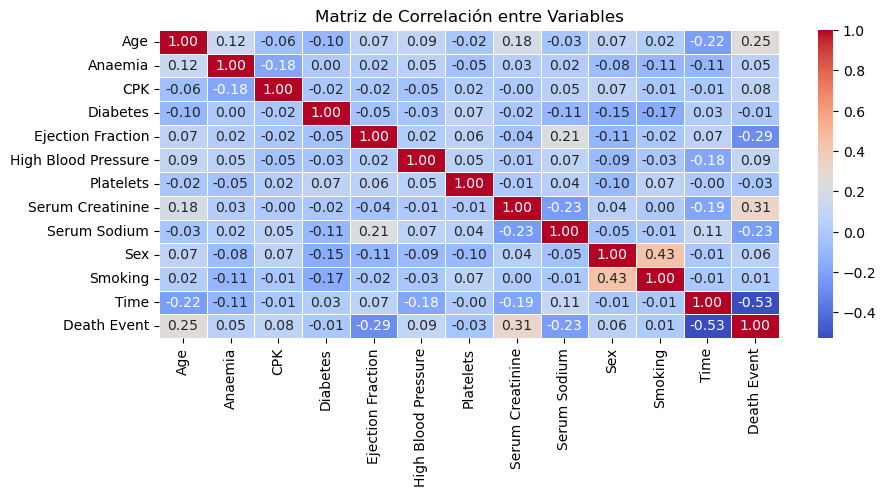

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
sns.heatmap(df_n.corr(method='pearson'), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.show()

Muchas variables no estan fuertemente correlacionadas con la variable que me interesa Death Event.

Las variables que muestran una correlación moderada con Death Event son:

Age: La edad avanzada se asocia con un mayor riesgo de muerte en pacientes con insuficiencia cardíaca.

Ejection Fraction: La fracción de eyección mide el porcentaje de sangre que el ventrículo izquierdo expulsa con cada contracción. Una fracción de eyección baja indica una función cardíaca deficiente, lo que se asocia con un mayor riesgo de complicaciones y muerte en pacientes con insuficiencia cardíaca.

Serum Creatinine: Los niveles elevados de creatinina en sangre indican una función renal deficiente. La insuficiencia renal es un factor de riesgo significativo para el pronóstico en pacientes con insuficiencia cardíaca, ya que ambos órganos están estrechamente relacionados en su función.

Serum Sodium: Los niveles de sodio en sangre pueden reflejar el estado de hidratación y la función renal. La hiponatremia (bajo nivel de sodio) es un marcador común en pacientes con insuficiencia cardíaca avanzada y se asocia con un peor pronóstico.

Time: El seguimiento del tiempo desde el diagnóstico o desde el inicio de un tratamiento específico puede proporcionar información sobre la progresión de la enfermedad y la efectividad de las intervenciones terapéuticas.
Por lo tanto estas variables pueden ser importantes para evaluar el riesgo de muerte en pacientes con insuficiencia cardíaca.

Es bueno saber que la correlación de Platelets con Death Event es baja ya que esta presentaba mayor cantidad de valores atipicos, por lo tanto no lo consideramos para los valores de entrada de la Red Neuronal, ya que pueden distorsionar la representación de los datos y afectar negativamente el proceso de entrenamiento y la capacidad de generalización del modelo.

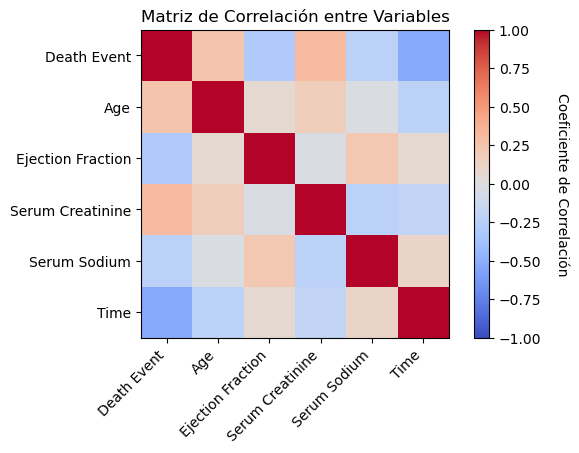

In [ ]:
# Analizamos la correlación de las columnas que me interesan mediante un mapa de calor.

data = ['Age', 'Ejection Fraction', 'Serum Creatinine', 'Serum Sodium', 'Time']  # Variables a considerar
labels = df_n.loc[:, ["Death Event"] + data].columns.to_list()
corr_matrix = df_n.loc[:, ["Death Event"] + data].corr().to_numpy()
fig, ax = plt.subplots(figsize=(8, 4))
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
cbar = fig.colorbar(cax, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Coeficiente de Correlación', rotation=270, labelpad=20)
plt.title('Matriz de Correlación entre Variables')
plt.show()

**Parte 2: Desarrollo de la Red Neuronal**

**Fordward Propagation**

- Se consideran solo las columnas que me interesan para las entradas de la red neuronal. De acuerdo al analisis de datos realizado anteriormente.
Las variables que muestran una correlación moderada con la variable que me interesa Death Event son: Age / Ejection Fraction / Serum Creatinine / Serum.Sodium / Time. De esta forma quite la variable Platelets y CPK, ya que estas presentaban mayor cantidad de valores atipicos.

- Se normalizan los datos con StandardScaler nuevamente, utilizando el DataFrame df inicial y no df_n (normalizado). Se realizó todo el analisis de los datos con el DataFrame normalizado "df_n" por una cuestión de comodidad pero por algun motivo la Red Neuronal funciona si normalizo los datos de entrada en esta parte del codigo considerando el analisis realizado, deberia dar lo mismo ya que se realizó la normalización de igual foma en ambas partes.

- Se utilizarón dos capas ocultas, la primera con 10 neuronas y la segunda con 5. Función de activación ReLU.

- Se Dividieron los datos en conjuntos de entrenamiento y prueba.

- 120000 máximo de iteraciones para el entrenamiento

- L = 0.01 tasa de aprendizaje

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[data].values
Y = df['Death Event'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

# Número de registros de entrenamiento
n = X_train.shape[0]

np.random.seed(42) # Agregamos el Seed para que de siempre los mismos valores random

# Construir red neuronal con pesos y sesgos
# Inicializar pesos y sesgos para las capas
# Capa 1 -> Capa 2
w_hidden1 = np.random.rand(10, 5)
b_hidden1 = np.random.rand(10, 1)

# Capa 2 -> Capa 3 (nueva capa intermedia)
w_hidden2 = np.random.rand(5, 10)
b_hidden2 = np.random.rand(5, 1)

# Capa 3 -> Salida
w_output = np.random.rand(1, 5)
b_output = np.random.rand(1, 1)

# Funciones de activación
relu = lambda x: np.maximum(x, 0)
relu_derivative = lambda x: (x > 0).astype(float)
logistic = lambda x: 1 / (1 + np.exp(-x))
logistic_derivative = lambda x: logistic(x) * (1 - logistic(x))

# Función q ejecuta entradas a través de la red neuronal para obtener salidas predichas
def forward_prop(X):
    Z1 = w_hidden1 @ X + b_hidden1
    A1 = relu(Z1)
    Z2 = w_hidden2 @ A1 + b_hidden2
    A2 = relu(Z2)
    Z3 = w_output @ A2 + b_output
    A3 = logistic(Z3)
    return Z1, A1, Z2, A2, Z3, A3

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[5]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)

#El valor de precisión (accuracy) significa que aproximadamente el 31.37% de las predicciones
# realizadas por la red neuronal en el conjunto de prueba (X_test) fueron correctas.

ACCURACY:  0.3245350929814037


Se utilizá el método Descenso de Gradiente Estocástico (SGD) para el entrenamiento de la red Neuronal

In [ ]:
L = 0.01 # La tasa de aprendizaje

# Devuelve pendientes para pesos y sesgos
# usando la regla de la cadena
def backward_prop(Z1, A1, Z2, A2, Z3, A3, X, Y):
    dC_dA3 = 2 * (A3 - Y)
    dA3_dZ3 = logistic_derivative(Z3)
    dZ3_dW3 = A2
    dZ3_dA2 = w_output
    dC_dZ3 = dC_dA3 * dA3_dZ3

    dC_dW3 = dC_dZ3 @ dZ3_dW3.T
    dC_dB3 = np.sum(dC_dZ3, axis=1, keepdims=True)

    dC_dA2 = dZ3_dA2.T @ dC_dZ3
    dA2_dZ2 = relu_derivative(Z2)
    dZ2_dW2 = A1
    dZ2_dA1 = w_hidden2
    dC_dZ2 = dC_dA2 * dA2_dZ2

    dC_dW2 = dC_dZ2 @ dZ2_dW2.T
    dC_dB2 = np.sum(dC_dZ2, axis=1, keepdims=True)

    dC_dA1 = dZ2_dA1.T @ dC_dZ2
    dA1_dZ1 = relu_derivative(Z1)
    dZ1_dW1 = X
    dC_dZ1 = dC_dA1 * dA1_dZ1

    dC_dW1 = dC_dZ1 @ dZ1_dW1.T
    dC_dB1 = np.sum(dC_dZ1, axis=1, keepdims=True)

    return dC_dW1, dC_dB1, dC_dW2, dC_dB2, dC_dW3, dC_dB3

accuracy_train_l = []
accuracy_test_l = []

# Ejecutar descenso de gradiente
for i in range(120000):
    # seleccionar aleatoriamente un conjunto de datos de entrenamiento
    idx = np.random.choice(n, 1, replace=False)
    X_sample = X_train[idx].transpose()
    Y_sample = Y_train[idx].reshape(1, 1)

    # pasar datos seleccionados aleatoriamente a través de la red neuronal
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample)

    # distribuir error a través de la retropropagación y devolver pendientes para pesos y sesgos
    dW1, dB1, dW2, dB2, dW3, dB3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, X_sample, Y_sample)

    # Actualizar pesos y sesgos
    w_hidden1 -= L * dW1
    b_hidden1 -= L * dB1
    w_hidden2 -= L * dW2
    b_hidden2 -= L * dB2
    w_output -= L * dW3
    b_output -= L * dB3

    # Cálculo de precisión del train
    train_predictions = forward_prop(X_train.transpose())[5]
    train_predictions = (train_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
    accuracy_train = np.mean(train_predictions == Y_train.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
    accuracy_train_l.append(accuracy_train)
    #print("X_Train ACCURACY: ", accuracy_train)

    # Cálculo de precisión del test
    test_predictions = forward_prop(X_test.transpose())[5]
    test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
    accuracy_test = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
    accuracy_test_l.append(accuracy_test)
    #print("X_Test ACCURACY: ", accuracy_test)

# Cálculo de precisión
test_predictions = forward_prop(X_test.transpose())[5]
test_predictions = (test_predictions >= 0.5).astype(int)  # Convertir las predicciones en valores binarios
accuracy = np.mean(test_predictions == Y_test.reshape(1, -1))  # Calcular la precisión comparando las predicciones con los valores reales
print("ACCURACY: ", accuracy)

# El valor de precisión (accuracy) es  94,90% (mayor q el anterior) indica la proporción de predicciones correctas realizadas
# por la red neuronal en el conjunto de prueba (X_test) después de entrenarla mediante el descenso de gradiente.


ACCURACY:  0.9268146370725855


 Gráfico de  Accuracy Train y Accuracy Test

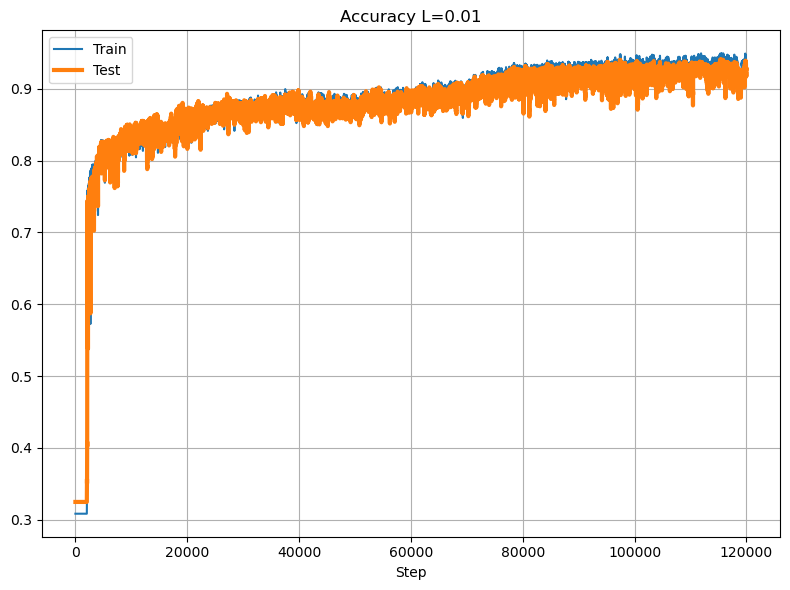

In [ ]:
fmt_train = {
    'color': 'tab:blue',
    'ls': 'solid',
    'lw' : 3,
 }
fmt_test = {
    'color': 'tab:orange',
    'ls': 'solid',
    'lw' : 3,
  }
fig, (ax) = plt.subplots(1,1,figsize=(8,6))
ax.plot(accuracy_train_l, label='Train', )
ax.plot(accuracy_test_l, label='Test', **fmt_test)

ax.grid(which='both')
ax.legend()
ax.set_title(f'Accuracy {L=}')
ax.set_xlabel('Step')

fig.tight_layout()
plt.show()

En el gráfico se puede ver como la red neuronal va aprendiendo

Realizamos pruebas de la Red Neuronal con 10 valores aleatorios de los 5000 registros de pacientes.

In [ ]:
data1 = ['Age','Ejection Fraction', 'Serum Creatinine','Serum Sodium', 'Time', 'Death Event']
filas_aleatorias = df[data1].sample(n=10)  # Obtener 10 filas aleatorias solo para las columnas especificadas en 'data'
filas_aleatorias2 = filas_aleatorias.loc[:, filas_aleatorias.columns[:-1]]
filas_aleatorias

,Age,Ejection Fraction,Serum Creatinine,Serum Sodium,Time,Death Event
635,60.0,20,0.7,139,73,1
2748,50.0,38,1.1,137,11,1
2251,68.0,60,1.0,140,237,0
2025,70.0,40,1.0,137,247,0
26,63.0,45,0.7,137,186,0
845,50.0,30,1.2,138,29,0
926,47.0,40,0.9,140,245,0
974,70.0,40,1.0,136,44,1
4980,60.0,38,2.2,132,45,1
4298,70.0,45,0.8,136,80,0


In [ ]:
filas_aleatorias2

,Age,Ejection Fraction,Serum Creatinine,Serum Sodium,Time
635,60.0,20,0.7,139,73
2748,50.0,38,1.1,137,11
2251,68.0,60,1.0,140,237
2025,70.0,40,1.0,137,247
26,63.0,45,0.7,137,186
845,50.0,30,1.2,138,29
926,47.0,40,0.9,140,245
974,70.0,40,1.0,136,44
4980,60.0,38,2.2,132,45
4298,70.0,45,0.8,136,80


In [ ]:
for i, row in filas_aleatorias2.iterrows():
    X_sample = row.values.reshape(1, -1)  # Datos de entrada en la Red Nueronal
    X_sample = scaler.transform(X_sample) # Normalizar

    Z1, A1, Z2, A2, Z3, A3 = forward_prop(X_sample.transpose()) # Esta función devuelve las activaciones y salidas de cada capa de la red neuronal.

    prediccion = (A3 > 0.5).astype(int) # Realiza una clasificación binaria

    print("Fila", i)
    print("Activaciones de la capa de salida:", A3)
    print("Predicción:", prediccion)
    valor = filas_aleatorias.loc[i, 'Death Event']
    print(f"Death Event en el Dataframe es: {valor}")
    print("\n")

Fila 635
Activaciones de la capa de salida: [[0.9368665]]
Predicción: [[1]]
Death Event en el Dataframe es: 1


Fila 2748
Activaciones de la capa de salida: [[0.99710726]]
Predicción: [[1]]
Death Event en el Dataframe es: 1


Fila 2251
Activaciones de la capa de salida: [[3.2128146e-18]]
Predicción: [[0]]
Death Event en el Dataframe es: 0


Fila 2025
Activaciones de la capa de salida: [[1.23348997e-10]]
Predicción: [[0]]
Death Event en el Dataframe es: 0


Fila 26
Activaciones de la capa de salida: [[3.88910073e-10]]
Predicción: [[0]]
Death Event en el Dataframe es: 0


Fila 845
Activaciones de la capa de salida: [[0.29815682]]
Predicción: [[0]]
Death Event en el Dataframe es: 0


Fila 926
Activaciones de la capa de salida: [[7.36480107e-09]]
Predicción: [[0]]
Death Event en el Dataframe es: 0


Fila 974
Activaciones de la capa de salida: [[0.98983392]]
Predicción: [[1]]
Death Event en el Dataframe es: 1


Fila 4980
Activaciones de la capa de salida: [[0.97490757]]
Predicción: [[1]]
De

Se realizó una comparación entre las predicciones generadas por la capa de salida de la red neuronal y los valores reales de la columna 'Death Event' en el DataFrame.

**Parte 3:  Comparación con scikit-learn**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop(columns=['Death Event']).values
Y = df['Death Event'].values

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Separar los datos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

# Crear el modelo
nn = MLPClassifier(solver='adam',               #Indica el algoritmo a utilizar para optimizar los pesos de la red neuronal
                   hidden_layer_sizes=(10, 5),  #Red con dos capas ocultas, la primera con 10 neuronas y la segunda con 5 neuronas
                   activation='relu',
                   max_iter=100000,
                   learning_rate_init=0.01,     #Tasa de aprendizaje
                   alpha=0.0001)                #prevenir el sobreajuste

# Entrenar el modelo
nn.fit(X_train, Y_train)            #Durante el proceso de ajuste, el algoritmo de optimización Adam realizará iteraciones a través del conjunto de datos de
                                    #entrenamiento, actualizando los pesos de la red neuronal para minimizar la función de pérdida.
# Imprimir pesos y sesgos
#print("Pesos de las capas:", nn.coefs_)
#print("Sesgos de las capas:", nn.intercepts_)

# Evaluar el modelo
train_score = nn.score(X_train, Y_train)         #calcula la precisión del modelo en los conjuntos de datos de entrenamiento
test_score = nn.score(X_test, Y_test)            #calcula la precisión del modelo en los conjuntos de datos de prueba
print("Puntaje del conjunto de entrenamiento: %f" % train_score)
print("Puntaje del conjunto de prueba: %f" % test_score)

Puntaje del conjunto de entrenamiento: 0.968797
Puntaje del conjunto de prueba: 0.933413


La implementación con Scikit-learn es más rápida en terminos de programación y ajusta automáticamente los parámetros del modelo, lo que puede ser conveniente pero puede no ofrecer el mismo nivel de control sobre el ajuste del modelo.

Se obtuvieron porcentajes de accuracy alrdedor del 90% mediante la implementación desde cero de la red neuronal y mediante la implementación estándar utilizando Scikit-learn los porcentajes obtenidos en el conjunto de entrenamiento y de prueba es de alrededor del 96% y 93% respectivamente.